In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

pd.set_option('display.max_colwidth', 1)
#to show all values in row

In [10]:
df_superstore = pd.read_csv('df_superstore.csv')
df_superstore

,category,city,country,customer_id,customer_name,discount,market,order_date,order_number,order_priority,product_number,product_name,profit,quantity,region,sales,segment,ship_date,ship_mode,shipping_cost,state,sub_category,order_id,market_id,product_id
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,2011-01-07,CA-2011-130813,High,OFF-PA-10002005,Xerox 225,9.3312,3,West,19,Consumer,2011-01-09,Second Class,4.37,California,Paper,CA-2011-130813_1,US-1,OFF-PA-100020051
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,2011-01-21,CA-2011-148614,Medium,OFF-PA-10002893,"Wirebound Service Call Books, 5 1/2"" x 4""",9.2928,2,West,19,Consumer,2011-01-26,Standard Class,0.94,California,Paper,CA-2011-148614_1,US-1,OFF-PA-100028931
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05,CA-2011-118962,Medium,OFF-PA-10000659,"Adams Phone Message Book, Professional, 400 Message Capacity, 5 3/6” x 11”",9.8418,3,West,21,Consumer,2011-08-09,Standard Class,1.81,California,Paper,CA-2011-118962_1,US-1,OFF-PA-100006591
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05,CA-2011-118962,Medium,OFF-PA-10001144,Xerox 1913,53.2608,2,West,111,Consumer,2011-08-09,Standard Class,4.59,California,Paper,CA-2011-118962_2,US-1,OFF-PA-100011441
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,2011-09-29,CA-2011-146969,High,OFF-PA-10002105,Xerox 223,3.1104,1,West,6,Consumer,2011-10-03,Standard Class,1.32,California,Paper,CA-2011-146969_1,US-1,OFF-PA-100021051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,2014-12-03,CA-2014-109701,High,OFF-BI-10000632,Satellite Sectional Post Binders,22.5732,2,West,69,Corporate,2014-12-04,Same Day,5.15,California,Binders,CA-2014-109701_4,US-1,OFF-BI-100006321
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,2014-12-03,CA-2014-109701,High,OFF-BI-10004187,Staples,3.1584,6,West,9,Corporate,2014-12-04,Same Day,0.44,California,Binders,CA-2014-109701_5,US-1,OFF-BI-100041871
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,2014-12-18,CA-2014-106964,Medium,OFF-BI-10000320,GBC Plastic Binding Combs,4.2804,2,West,12,Home Office,2014-12-21,First Class,0.31,California,Binders,CA-2014-106964_1,US-1,OFF-BI-100003201
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,2014-12-25,CA-2014-145219,Critical,OFF-BI-10001670,Vinyl Sectional Post Binders,33.9300,3,West,90,Home Office,2014-12-26,First Class,15.95,California,Binders,CA-2014-145219_2,US-1,OFF-BI-100016701


# Counting and sorting the unique values for each numerical column in descending order
df_superstore.select_dtypes("number").nunique().sort_values(ascending=False)

In [12]:
# Counting and sorting the unique values for each object (string) column in descending order
df_superstore.select_dtypes("object").nunique().sort_values(ascending=False)

order_id          51290
order_number      25035
product_id        10768
product_number    10292
customer_id       4873 
product_name      3788 
city              3636 
ship_date         1464 
order_date        1430 
state             1094 
customer_name     795  
market_id         149  
country           147  
sub_category      17   
region            13   
market            7    
ship_mode         4    
order_priority    4    
category          3    
segment           3    
dtype: int64

# < Univariate Analysis

### < Categorical Variables

In [15]:
# Creating a crosstab table for the 'category' column, counting occurrences for each unique value
categories = pd.crosstab(index = df_superstore["category"],  # Make a crosstab
                              columns="count")    # Name the count column
categories = categories.sort_values(by='count', ascending=False) 
categories

col_0,count
category,
Office Supplies,31273
Technology,10141
Furniture,9876


In [16]:
# Calculating the proportions for each value in 'categories' and rounding the results to two decimal places
(categories/categories.sum()).round(2)

col_0,count
category,
Office Supplies,0.61
Technology,0.20
Furniture,0.19


/var/folders/1_/fmystfg15lbf3t1n1mmy4psw0000gn/T/ipykernel_1917/2522961009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories.index, y=categories["count"], palette="Set3");


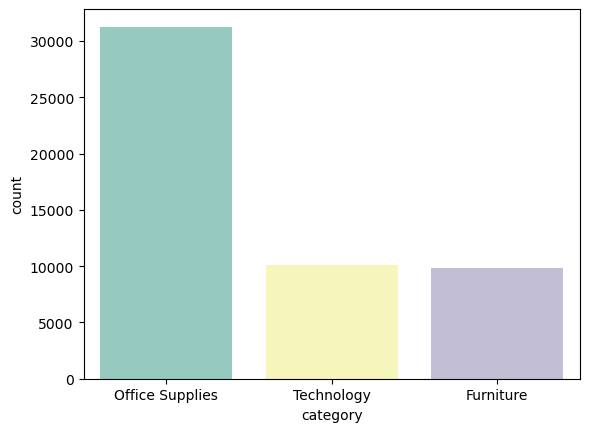

In [17]:
# Plotting a bar chart using the 'count' values from 'categories', with colors sourced from the "Set3" palette
sns.barplot(x=categories.index, y=categories["count"], palette="Set3");

<Axes: ylabel='category'>

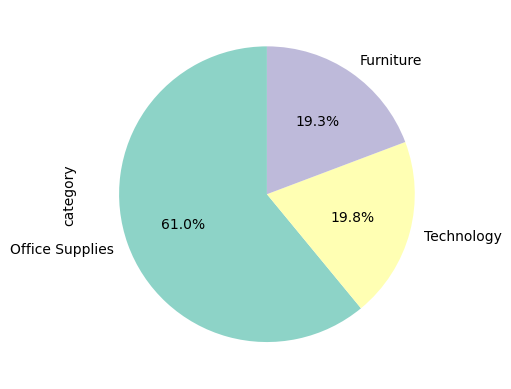

In [18]:
# Plotting a pie chart of the 'category' column value counts, with percentage labels, 
# starting at angle 90, and using colors from the "Set3" Seaborn palette
df_superstore['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

In [19]:
# Creating a crosstab table for the 'category' column, counting occurrences for each unique value
sub_categories = pd.crosstab(index = df_superstore["sub_category"],  # Make a crosstab
                              columns="count")    # Name the count column
sub_categories = sub_categories.sort_values(by='count', ascending=False) 
sub_categories

col_0,count
sub_category,
Binders,6152
Storage,5059
Art,4883
Paper,3538
Chairs,3434
Phones,3357
Furnishings,3170
Accessories,3075
Labels,2606


In [20]:
# Calculating the proportions for each value in 'sub_categories' and rounding the results to two decimal places
(sub_categories/sub_categories.sum()).round(2)

col_0,count
sub_category,
Binders,0.12
Storage,0.10
Art,0.10
Paper,0.07
Chairs,0.07
Phones,0.07
Furnishings,0.06
Accessories,0.06
Labels,0.05


/var/folders/1_/fmystfg15lbf3t1n1mmy4psw0000gn/T/ipykernel_1917/1249156915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_categories.index, y=sub_categories["count"], palette="Set3");


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Binders'),
  Text(1, 0, 'Storage'),
  Text(2, 0, 'Art'),
  Text(3, 0, 'Paper'),
  Text(4, 0, 'Chairs'),
  Text(5, 0, 'Phones'),
  Text(6, 0, 'Furnishings'),
  Text(7, 0, 'Accessories'),
  Text(8, 0, 'Labels'),
  Text(9, 0, 'Envelopes'),
  Text(10, 0, 'Supplies'),
  Text(11, 0, 'Fasteners'),
  Text(12, 0, 'Bookcases'),
  Text(13, 0, 'Copiers'),
  Text(14, 0, 'Appliances'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Tables')])

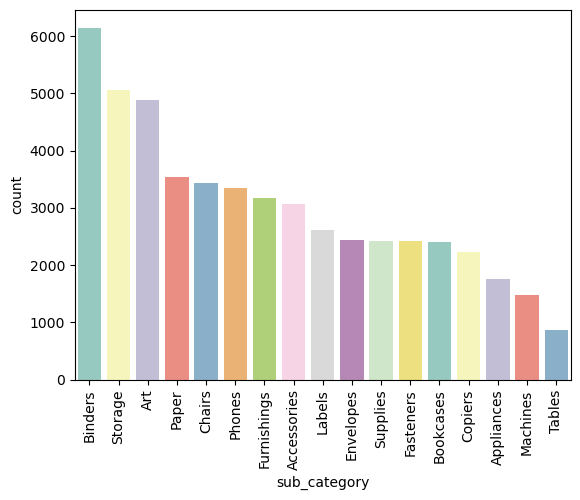

In [21]:
# Plotting a bar chart using the 'count' values from 'sub_categories', with colors sourced from the "Set3" palette
sns.barplot(x=sub_categories.index, y=sub_categories["count"], palette="Set3");
plt.xticks(rotation=90)

### Categorical Variables >

### < Numerical Variables

In [24]:
# Summary statistics for the dataset
df_superstore.describe()

,discount,profit,quantity,sales,shipping_cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,28.610982,3.476545,246.498440,26.375818
std,0.212280,174.340972,2.278766,487.567175,57.296810
min,0.000000,-6599.978000,1.000000,0.000000,0.002000
25%,0.000000,0.000000,2.000000,31.000000,2.610000
50%,0.000000,9.240000,3.000000,85.000000,7.790000
75%,0.200000,36.810000,5.000000,251.000000,24.450000
max,0.850000,8399.976000,14.000000,22638.000000,933.570000


In [25]:
df_superstore.loc[df_superstore['profit'] < 0]

,category,city,country,customer_id,customer_name,discount,market,order_date,order_number,order_priority,product_number,product_name,profit,quantity,region,sales,segment,ship_date,ship_mode,shipping_cost,state,sub_category,order_id,market_id,product_id
29009,Technology,Paris,France,RC-198252,Roy Collins,0.15,EU,2011-04-26,IT-2011-2185983,Critical,TEC-PH-10000070,"Nokia Headset, with Caller ID",-24.2715,11,Central,684,Consumer,2011-04-27,Same Day,100.32,Ile-de-France,Phones,IT-2011-2185983_1,EU-1,TEC-PH-100000701
29012,Technology,Taverny,France,TB-211752,Thomas Boland,0.15,EU,2011-08-26,ES-2011-5235241,High,TEC-CO-10004034,"Canon Fax Machine, High-Speed",-19.0170,2,Central,538,Corporate,2011-08-27,Same Day,70.11,Ile-de-France,Copiers,ES-2011-5235241_3,EU-1,TEC-CO-100040341
29018,Technology,Tremblay-en-France,France,DH-130752,Dave Hallsten,0.15,EU,2011-12-02,ES-2011-4614329,High,TEC-MA-10000261,"StarTech Calculator, Red",-0.0495,3,Central,95,Corporate,2011-12-04,First Class,5.53,Ile-de-France,Machines,ES-2011-4614329_2,EU-1,TEC-MA-100002611
29021,Technology,Guyancourt,France,MH-174552,Mark Hamilton,0.15,EU,2012-06-07,ES-2012-2141914,High,TEC-PH-10002076,"Samsung Audio Dock, Full Size",-6.7560,2,Central,286,Consumer,2012-06-11,Second Class,60.78,Ile-de-France,Phones,ES-2012-2141914_1,EU-1,TEC-PH-100020761
29024,Technology,Le Plessis-Robinson,France,AA-104802,Andrew Allen,0.15,EU,2012-08-30,IT-2012-5602177,Medium,TEC-CO-10002157,"Canon Fax Machine, Laser",-111.4995,7,Central,1894,Consumer,2012-09-02,Second Class,111.55,Ile-de-France,Copiers,IT-2012-5602177_1,EU-1,TEC-CO-100021571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51156,Technology,Los Angeles,United States,LH-171554,Logan Haushalter,0.20,US,2013-05-22,US-2013-139486,High,TEC-PH-10003555,Motorola HK250 Universal Bluetooth Headset,-12.4146,3,West,55,Consumer,2013-05-24,First Class,17.61,California,Phones,US-2013-139486_2,US-1,TEC-PH-100035551
51163,Technology,Los Angeles,United States,SC-202304,Scot Coram,0.20,US,2013-08-22,US-2013-126452,Low,TEC-PH-10003187,Anker Astro Mini 3000mAh Ultra-Compact Portable Charger,-7.9960,2,West,32,Corporate,2013-08-29,Standard Class,4.74,California,Phones,US-2013-126452_5,US-1,TEC-PH-100031871
51164,Technology,Los Angeles,United States,SC-202304,Scot Coram,0.20,US,2013-08-22,US-2013-126452,Low,TEC-PH-10003555,Motorola HK250 Universal Bluetooth Headset,-20.6910,5,West,92,Corporate,2013-08-29,Standard Class,14.61,California,Phones,US-2013-126452_6,US-1,TEC-PH-100035551
51180,Technology,Los Angeles,United States,MG-176804,Maureen Gastineau,0.20,US,2014-06-09,US-2014-109316,Medium,TEC-PH-10000307,Shocksock Galaxy S4 Armband,-3.5040,2,West,18,Home Office,2014-06-11,First Class,0.94,California,Phones,US-2014-109316_2,US-1,TEC-PH-100003071


In [26]:
# Creating histograms for each numerical column in 'df_numerical'

df_numerical = df_superstore.select_dtypes("number")
df_numerical

,discount,profit,quantity,sales,shipping_cost
0,0.0,9.3312,3,19,4.37
1,0.0,9.2928,2,19,0.94
2,0.0,9.8418,3,21,1.81
3,0.0,53.2608,2,111,4.59
4,0.0,3.1104,1,6,1.32
...,...,...,...,...,...
51285,0.2,22.5732,2,69,5.15
51286,0.2,3.1584,6,9,0.44
51287,0.2,4.2804,2,12,0.31
51288,0.2,33.9300,3,90,15.95


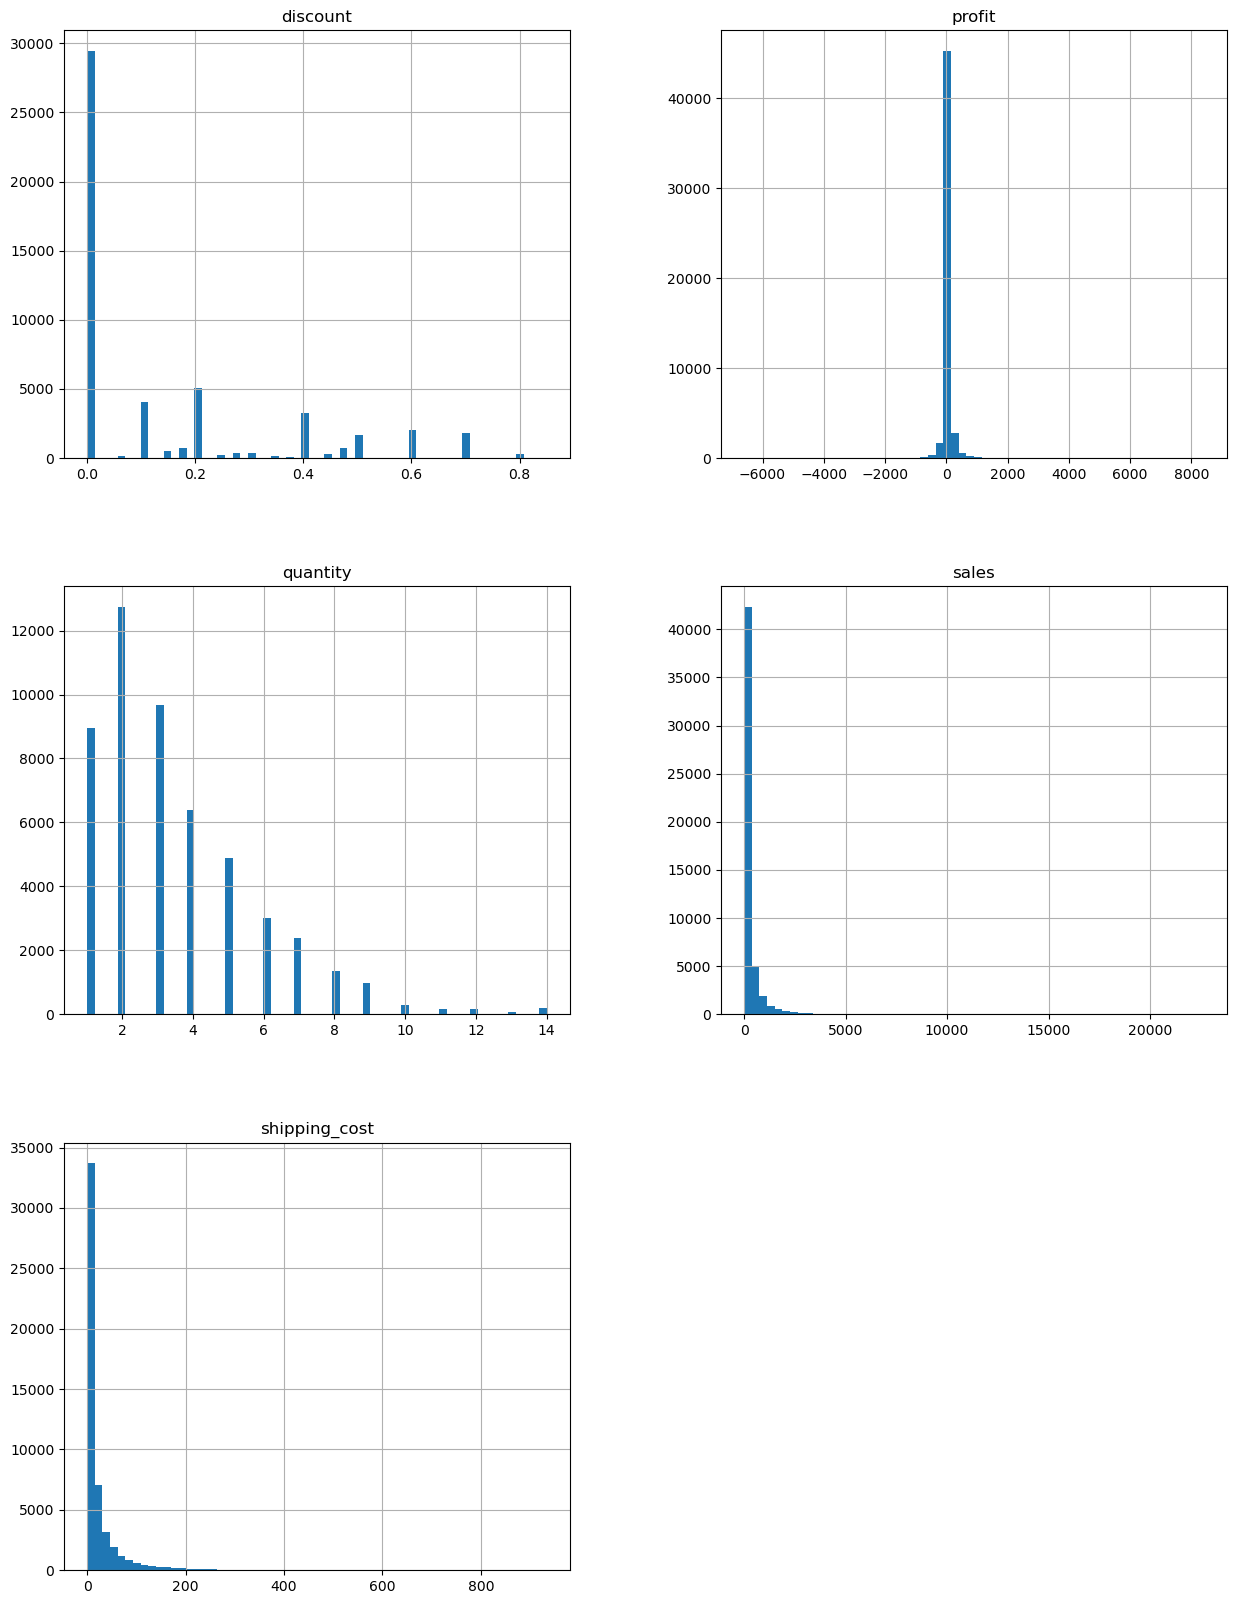

In [27]:
# Creating histograms for each numerical column in 'df_numerical'
df_numerical.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

<Axes: xlabel='profit', ylabel='Count'>

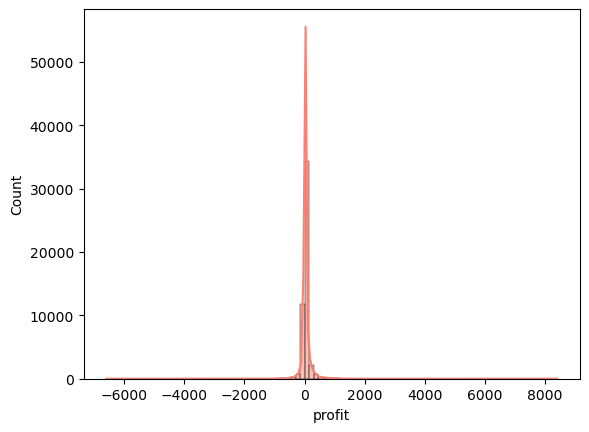

In [61]:
# Plotting a histogram for the 'SalePrice' column of the 'data' dataframe
# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="salmon"' sets the color of the bars to salmon
sns.histplot(df_superstore['profit'], kde=True, bins=100, color="salmon")

### Numerical Variables >

# Univariate Analysis >

# < Bivariate Analysis

In [63]:
df_superstore.head()

,category,city,country,customer_id,customer_name,discount,market,order_date,order_number,order_priority,product_number,product_name,profit,quantity,region,sales,segment,ship_date,ship_mode,shipping_cost,state,sub_category,order_id,market_id,product_id
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,2011-01-07,CA-2011-130813,High,OFF-PA-10002005,Xerox 225,9.3312,3,West,19,Consumer,2011-01-09,Second Class,4.37,California,Paper,CA-2011-130813_1,US-1,OFF-PA-100020051
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,2011-01-21,CA-2011-148614,Medium,OFF-PA-10002893,"Wirebound Service Call Books, 5 1/2"" x 4""",9.2928,2,West,19,Consumer,2011-01-26,Standard Class,0.94,California,Paper,CA-2011-148614_1,US-1,OFF-PA-100028931
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05,CA-2011-118962,Medium,OFF-PA-10000659,"Adams Phone Message Book, Professional, 400 Message Capacity, 5 3/6” x 11”",9.8418,3,West,21,Consumer,2011-08-09,Standard Class,1.81,California,Paper,CA-2011-118962_1,US-1,OFF-PA-100006591
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05,CA-2011-118962,Medium,OFF-PA-10001144,Xerox 1913,53.2608,2,West,111,Consumer,2011-08-09,Standard Class,4.59,California,Paper,CA-2011-118962_2,US-1,OFF-PA-100011441
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,2011-09-29,CA-2011-146969,High,OFF-PA-10002105,Xerox 223,3.1104,1,West,6,Consumer,2011-10-03,Standard Class,1.32,California,Paper,CA-2011-146969_1,US-1,OFF-PA-100021051


# Bivariate Analysis >